# Importing Library

In [39]:
import numpy as np
import math
from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.circuit.library import QFT,RYGate
from qiskit.visualization import *
%matplotlib inline

### Two controled RY Gate

In [3]:
import fractions

def CY(a,b):
    qc = QuantumCircuit(2)
    th = 2*np.arccos(np.sqrt(a/b))
    qc.cry(th, 1, 0)
    gate = qc.to_gate(label = 'CY' + f'[{a}/{b}]')
    return gate

def CCY(a,b):
    th = 2*np.arccos(np.sqrt(a/b))
    qc = QuantumCircuit(3)
    qc.ry(th/2,0)
    qc.ccx(2,1,0)
    qc.ry(-th/2,0)
    qc.ccx(2,1,0)


    gate = qc.to_gate(label = 'CCY' + f'[{a}/{b}]')
    return gate
print(fractions.Fraction(1.5))

3/2


In [4]:
from itertools import combinations
comb = combinations([i for i in range(n)],k)
len([i for i in comb])

NameError: name 'n' is not defined

### Creating Dicke States

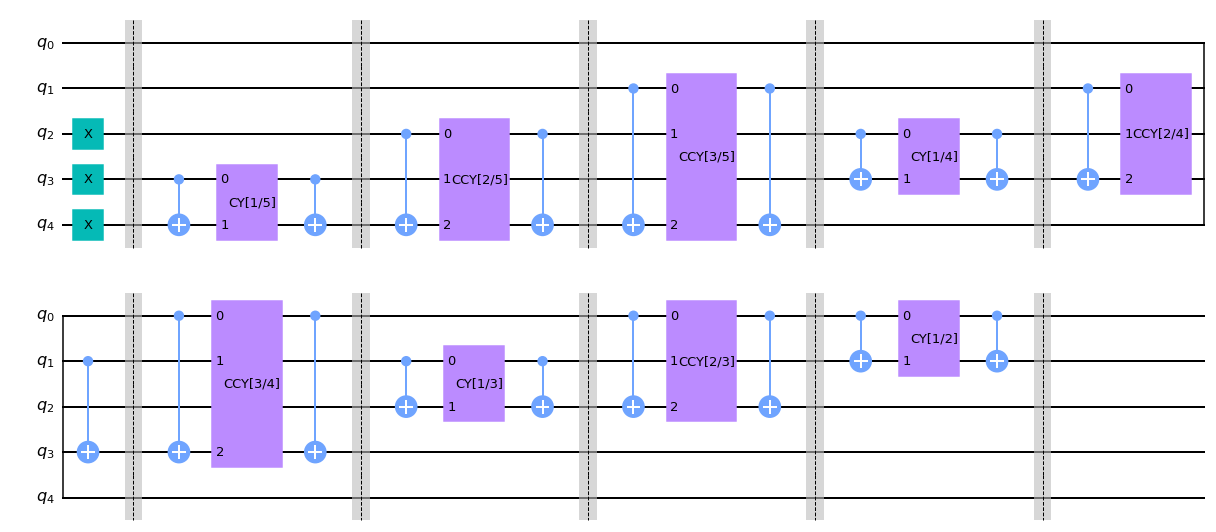

In [16]:
# qauntum states with n qubits with k elements equal 1

def DickeState(n, k, simulator):
    qr = QuantumRegister(n, 'q')
    cr = ClassicalRegister(n,'c')
    if simulator == 'qasm':
        qc = QuantumCircuit(qr,cr)
    if simulator == 'stv':
        qc = QuantumCircuit(qr)

    #inicializando qubits --- devemos adicionar x gate aos últimos k qubits
    for i in range(k):
        qc.x(n - i - 1)

    qc.barrier()

    for l in range(1,n):
        aux = 1
        for i in range(n- l, n-(l+k),-1):
            if i - 1 < 0:
                break
            
            num = aux/(n - l + 1)
            
#             th = 2*np.arccos(np.sqrt(num))
            if i == n-l:
                qc.cx(qr[i-1], qr[n-l])
                qc.append(CY(aux, n - l + 1), [qr[i-1], qr[i]])
                qc.cx(qr[i-1], qr[n-l])
                qc.barrier()
            elif i - 1 > -1:
                qc.cx(i-1, n - l)
                qc.append(CCY(aux,n - l + 1), [qr[i-1],qr[i],qr[n-l]])
                qc.cx(i-1, n -l)
                qc.barrier()
            aux += 1

    if simulator == 'qasm':
        qc.measure(range(n), range(n))
    qc.draw('mpl')
    return qc

n,k = 5,3
qc = DickeState(n,k,'stv')
qc.draw('mpl', scale = 1)


Total number of states with 5 qubits with 3 qubits equal 1: 10
Total number of superposition states: 10
Ploting statevector simulator


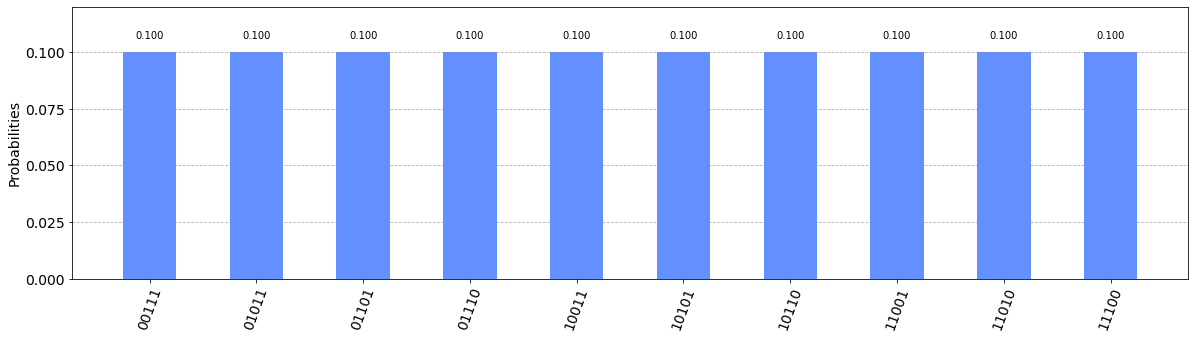

In [17]:
n,k = 5,3

from itertools import combinations
comb = combinations([i for i in range(n)],k)
total = [i for i in comb]

print(f"Total number of states with {n} qubits with {k} qubits equal 1: {len(total)}")

qc_stv = DickeState(n,k,'stv')
qc_qasm = DickeState(n,k,'qasm')



simulator_stv = Aer.get_backend('statevector_simulator')
simulator_qasm = Aer.get_backend('qasm_simulator')


result_stv = execute(qc_stv, simulator_stv).result().get_counts()
result_qasm = execute(qc_qasm, simulator_qasm, shots = 30000).result().get_counts()




print(f"Total number of superposition states: {len(result_stv)}")
print("Ploting statevector simulator")
plot_histogram(result_stv, figsize= (20,5))




In [ ]:
print("Ploting qasm-simulator solution")

plot_histogram(result_qasm, figsize= (20,5))